# C3M4 Lesson 4 Practice Lab: London housing prices - Part 4

Your parents are considering selling their London home to move to a quieter area with a spacious backyard. To help them make a smart financial decision, you’ll analyze historical house prices from 1995 to 2024. By examining trends and patterns in the data, you can identify the best time to sell and provide insights into the long-term trajectory of the market. This analysis will ensure they maximize their return and confidently take the next step toward their dream home.

In this module's practice labs you will be working with just two columns from the [London House Price Data](https://www.kaggle.com/datasets/jakewright/house-price-data): 

- `history_date`: Date when the sale was made
- `history_price`: Price at which the property was sold

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Process the data: aggregate weekly](#process-data)
- [Step 4: Training a linear regression model](#training-a-model)
- [Step 5: Making predictions](#making-predictions)

<a id="import-libraries"></a>

## Step 1: Import libraries
Begin by importing pandas library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

<a id="load-the-data"></a>

## Step 2: Load the data
Next, you will be loading the data. Run the cell below to load the data. You can also inspect <strong><a href="https://drive.google.com/file/d/1kiHq3q3P_553DxmUBRnELeFOIh2Hjpbp/view?usp=sharing">the data in spreadsheet format</a></strong>. 

,history_date,history_price
0,1995-01-02,830000
1,1995-01-02,830000
2,1995-01-03,82500
3,1995-01-03,75000
4,1995-01-03,45000


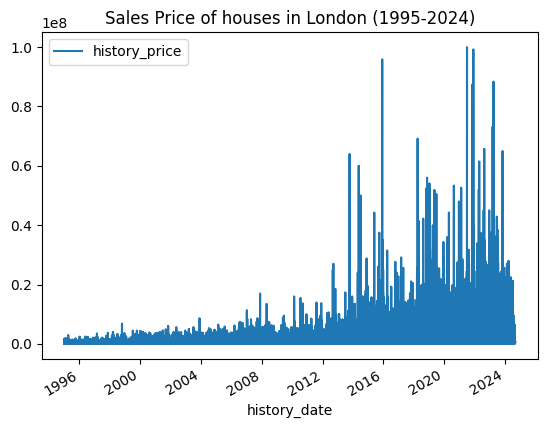

In [2]:
# load the data
price = pd.read_csv("history_price.csv", parse_dates=['history_date'] )

# plot the time series
price.plot(x="history_date", y="history_price", 
           title="Sales Price of houses in London (1995-2024)")
# visualize the first values
price.head()

This has so much variability! Also, there are repeated dates, since more than one house can be sold in one day. One of the things you want to know is the trend of house prices, so you decide to aggregate data weekly in order to get a smoother curve.

<a id="process-data"></a>

## Step 3: Process the Data: Aggregate Weekly

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions** 
1. Set the date as the index to create the actual time series, and save it in the `price_ts` variable. You can do this using the `set_index()` method.
2. Resample the time series weekly. You can use the `resample()` method with the "W" argument.
3. Save the results in a new variable `price_ts`.
</div>

**Note**: All three steps should be done in a single line.

In [3]:
# set the date as index
price_ts = price.set_index('history_date',)

# take the average price for each week
price_ts = price_ts.resample('W').mean()

# visualize de time series
price_ts.head()

,history_price
history_date,
1995-01-08,176927.870370
1995-01-15,122692.084746
1995-01-22,123640.105263
1995-01-29,117331.205882
1995-02-05,131688.615385


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL4/tsweekly.png" width="150">
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# set the date as index
price_ts = price.set_index('history_date')

# take the average price for each week
price_ts = price_ts.resample('W').mean()

# visualize de time series
price_ts.head()
```
</details>

Next step is to plot the time series

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Plot the time series
1. Set appropriate title and labels for the axes
</div>



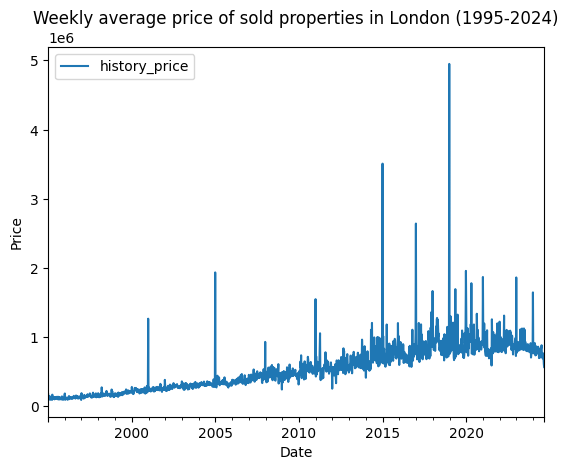

In [5]:
# plot the price
price_ts.plot(kind='line')

# add ylabel
plt.xlabel('Date')
# add ylabel
plt.ylabel('Price')

# add title
plt.title('Weekly average price of sold properties in London (1995-2024)')
plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

Your plot should look something like this (title and labels might change)
<img src="imgsL4/ts.png" width="350">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# plot the price
price_ts.plot()
# add ylabel
plt.xlabel("Date")
# add ylabel
plt.ylabel("Price")
# add title
plt.title("Weekly average price of sold properties in London (1995-2024)")
```
</details>

What can you say about this time series? Do you see a clear trend? What about seasonality?

<a id="training-a-model"></a>

## Step 4: Training a Linear Regression Model

In order to predict how housing prices will evolve over time, you decide to try a linear regression model.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Add a column `idx` to the time series DataFrame. Since the time series is already sorted, it should just be the values 0, 1, 2, .... You can do this with the `np.arange()` function.
2. Select the `idx` column as the predictor.
3. Add the constant term to the model.
4. Select the target variable (`history_price`).
5. Define and train the model using the `sm.OLS()` function and `fit` method respectively.
6. Print the model summary.
</div>

In [6]:
# add the idx colum
price_ts["idx"] = np.arange(len(price_ts))

# select the independent variable
X = price_ts['idx']
# add the constant term
X = sm.add_constant(X)
# select the dependent variable
y = price_ts['history_price']

# create and fit the model
model = sm.OLS(y,X).fit()

# print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          history_price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     3350.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        03:38:42   Log-Likelihood:                -21029.
No. Observations:                1548   AIC:                         4.206e+04
Df Residuals:                    1546   BIC:                         4.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.884e+04   9768.055      5.000      0.0

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 11px;">

```mkdn
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          history_price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     3350.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:25:24   Log-Likelihood:                -21029.
No. Observations:                1548   AIC:                         4.206e+04
Df Residuals:                    1546   BIC:                         4.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.884e+04   9768.055      5.000      0.000    2.97e+04     6.8e+04
idx          632.9159     10.935     57.881      0.000     611.467     654.364
==============================================================================
Omnibus:                     2502.886   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1976452.408
Skew:                          10.064   Prob(JB):                         0.00
Kurtosis:                     176.889   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```

</span>
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# add the idx colum
price_ts["idx"] = np.arange(len(price_ts))

# select the independent variable
X = price_ts["idx"]
# add the constant term
X = sm.add_constant(X)
# select the dependent variable
y = price_ts["history_price"]

# create and fit the model
model = sm.OLS(y,X).fit()

# print the summary
print(model.summary())
```
</details>

You got an R-squared of 0.684, not so bad! You still want to look at other error metrics for your model. Use the residuals from the model to find the Mean Absolute Error (MAE).

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Get the residuals from the model. Use the `resid` attribute from your model.
2. Find the MAE, which is the mean of the absolute difference between each residual and the true value of the price.
</div>

In [8]:
# get the residuals
resid = model.resid

# get the mean absolute error
MAE = (resid-y).abs().mean()

# print the mean absolute error
print("Mean Absolute Error:", round(MAE,2))

Mean Absolute Error: 538404.42


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

```mkdn
Mean Absolute Error: 538404.42
```
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# get the residuals
resid = model.resid

# get the mean absolute error
MAE = (resid-y).abs().mean()

# print the mean absolute error
print("Mean Absolute Error:", round(MAE,2))

```
</details>

It might seem like a big number, but always remember that we are talking about property prices.

<a id="making-predictions"></a>

## Step 5: Making Predictions

If you want to know how the market will evolve, you can use this model to make some predictions.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Create an array of future weeks, ranging 105 weeks (approximately 2 years).
2. Create a DataFrame with these values. Use the argument `columns=["idx"]` to make it look like the dataset you used to train.
3. Add the constant to the model.
4. Make the predictions using the `predict()` method of your trained model.
5. Plot the results.
</div>

In [9]:
price_ts.index

DatetimeIndex(['1995-01-08', '1995-01-15', '1995-01-22', '1995-01-29',
               '1995-02-05', '1995-02-12', '1995-02-19', '1995-02-26',
               '1995-03-05', '1995-03-12',
               ...
               '2024-06-30', '2024-07-07', '2024-07-14', '2024-07-21',
               '2024-07-28', '2024-08-04', '2024-08-11', '2024-08-18',
               '2024-08-25', '2024-09-01'],
              dtype='datetime64[ns]', name='history_date', length=1548, freq='W-SUN')

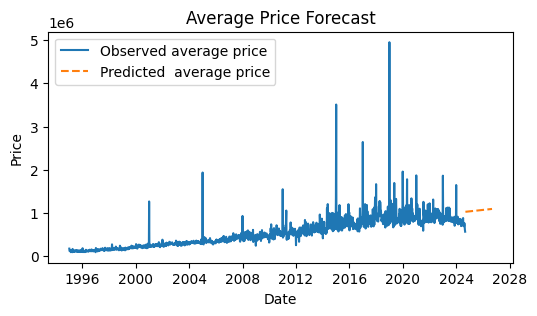

In [12]:
# create a new DataFrame a for 2 year into the future
future_weeks = np.arange(len(price_ts), len(price_ts) + 105)

# create the regressor DataFrame
X_future = pd.DataFrame(future_weeks, columns=['idx'])
X_future = sm.add_constant(X_future)

# make the predictions
predictions = model.predict(X_future)

# plot the predictions
plt.figure(figsize=(6, 3))
plt.plot(price_ts.index, price_ts['history_price'], label='Observed average price')

# get the first week (first sample) after the last observation
start_date = price_ts.index[-1] + pd.Timedelta(weeks=1)

# generate date range for predictions starting from the day after the last date in df
prediction_dates = pd.date_range(start=start_date, periods=105, freq='W')

# set up the plot
plt.plot(prediction_dates, predictions, label='Predicted  average price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Price Forecast')
plt.legend()
plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL4/predictions.png" width="350">
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# create a new DataFrame a for 2 year into the future
future_weeks = np.arange(len(price_ts), len(price_ts) + 105)

# create the regressor DataFrame
X_future = pd.DataFrame(future_weeks, columns=["idx"])
X_future = sm.add_constant(X_future)

# make the predictions
predictions = model.predict(X_future)

# plot the predictions
plt.figure(figsize=(6, 3))
plt.plot(price_ts.index, price_ts['history_price'], label='Observed average price')

# get the first week (first sample) after the last observation
start_date = price_ts.index[-1] + pd.Timedelta(weeks=1)

# generate date range for predictions starting from the day after the last date in df
prediction_dates = pd.date_range(start=start_date, periods=105, freq='W')

# set up the plot
plt.plot(prediction_dates, predictions, label='Predicted  average price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Average Price Forecast')
plt.legend()
plt.show()
```
</details>

According to your predictions, house prices are on the rise. What would you recommend your parents to do?

Congratulations for making it until the end of this lab. Hope you enjoyed it! 